### Constant eigenvalues 

**Initial condition**

$$\psi(x,0) = \mathcal{G}^{\epsilon}[q_0, p_0, C_0, \zeta_0]$$

**Potential**
$$
V(x) = 
    \begin{bmatrix}
        \delta & 0.0 
        \\
        0.0 & - \delta 
    \end{bmatrix}
$$

**Solution**
$$\psi(x,t) = \mathcal{G}^{\epsilon}[q_t, p_t, C_t, \zeta_t]$$ 
where 
$$q_t = q_0 + t*p_0, p_t = p_0, C_t = , \zeta_t = $$


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('lines', linewidth=2.5,linestyle="-.")
matplotlib.rc('lines', markersize=10)
matplotlib.rc('figure.subplot', hspace=.4)

import gaussian

In [4]:
data = np.loadtxt("parameters.txt")
g_list = [gaussian.Gaussian(1, row[1], row[2], row[3] + 1j*row[4], 0.1, row[7] + 1j*row[8], None) for row in data ]

0.9999999999999999
0.9999999999999996
0.9999999999999997
1.0000000000000002
0.9999999999999996
0.9999999999999988
0.9999999999949719
0.9999999984176661
0.9999999125260145
0.9999984148042066
0.9999863168283144
0.9999290580487336
0.999743599076477


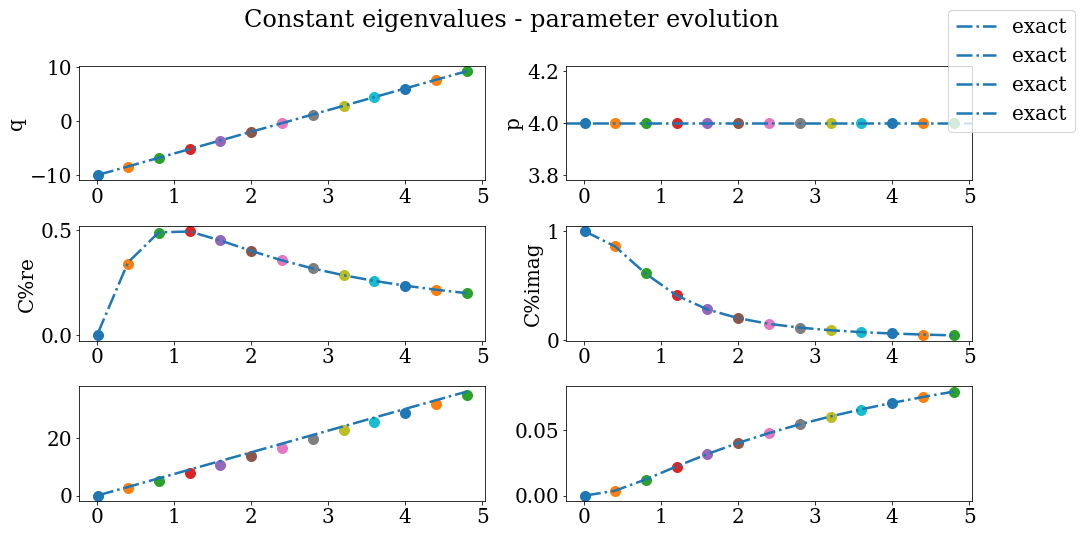

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2)
fig.suptitle('Constant eigenvalues - parameter evolution')

x = np.linspace(-15,15,10**3)
t = data[:,0]

for i, G in enumerate(g_list):
    #ax1[0].plot(x, np.abs(G.psi(x))**2)
    # compare momentum 
    ax1[0].scatter(data[i,0], G.q)
    ax1[1].scatter(data[i,0], G.p) # numerical integration 
    # covariance matrix
    ax2[0].scatter(data[i,0], G.C.real)
    ax2[1].scatter(data[i,0], G.C.imag)
    # phase 
    ax3[0].scatter(data[i,0], G.s.real)
    ax3[1].scatter(data[i,0], G.s.imag)
  
    
    #C_t[i + 1] = C_t[i] - C_t[i]**2 * (t[1] - t[0])
    #ax2[1].scatter(data[i,0], G.l2norm())
    print(G.l2norm())

# position analytical solution
ax1[0].plot(t, g_list[0].q + g_list[0].p * t, label = 'exact') 
ax1[0].set_ylabel('q')
# momentum analytical solution
ax1[1].axhline(y = g_list[0].p, label = 'exact') 
ax1[1].set_ylabel('p')
# covariance analytical solution 
C_t = 1 / (data[:,0] + 1/g_list[0].C)
ax2[0].plot( data[:,0], C_t.real, label = 'exact') 
ax2[0].set_ylabel('C%re')
ax2[1].plot( data[:,0], C_t.imag, label = 'exact') 
ax2[1].set_ylabel('C%imag')
# phase 
s = g_list[0].s + (g_list[0].p**2 / 2 - 0.5)*data[:,0] + 1j*g_list[0].eps / 2 * (np.log(1/C_t) - np.log(1/C_t[0]))
ax3[0].plot(data[:,0], s.real)
ax3[1].plot(data[:,0], s.imag)

# phase analytical solution

#true = gaussian.Gaussian(np.zeros(1),np.zeros(1),np.ones(1)*1j,1,1)
#print(true.l2norm(x))
#ax2.plot(x, true.real, label = 'original')
#ax2.plot(x, np.abs(y - true.psi(x)).real, label = 'abs error.re'
#ax1[1].legend()
#ax1[1].legend()
fig.legend()
# compare the variance and the phase and you should be done # compare parameters

### Error analysis